In [132]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

In [34]:
geo = pd.read_csv('geo.csv', sep=';', encoding='latin-1')
geo = geo.drop(columns=['Unnamed: 10'])
geo.columns = ['uai', 'name', 'denom', 'patronym', 'X', 'Y', 'state', 'nature', 'lib_nature', 'ss_fic']
geo = geo.set_index('uai')

/Users/hugo/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [35]:
effectifs = pd.read_csv('effectifs.csv', sep=';')
effectifs.columns = ['year', 'uai', 'academia', 'type', 'sector', 
                     'student_number', 'region_name', 'region_code', 'dep_code', 'dep']
effectifs = effectifs.set_index('uai')

In [36]:
effectifs.head()

,year,academia,type,sector,student_number,region_name,region_code,dep_code,dep
uai,,,,,,,,,
0480022N,2015-2016,MONTPELLIER,LYCEE,PRIVE,345,Occitanie,76.0,48,Lozère
0480038F,2015-2016,MONTPELLIER,COLLEGE,PRIVE,273,Occitanie,76.0,48,Lozère
0480688M,2015-2016,MONTPELLIER,LYCEE,PUBLIC,343,Occitanie,76.0,48,Lozère
0490014Z,2015-2016,NANTES,COLLEGE,PUBLIC,439,Pays-de-la-Loire,52.0,49,Maine-et-Loire
0490022H,2015-2016,NANTES,COLLEGE,PUBLIC,436,Pays-de-la-Loire,52.0,49,Maine-et-Loire


In [37]:
geo.head()

,name,denom,patronym,X,Y,state,nature,lib_nature,ss_fic
uai,,,,,,,,,
0010001W,Lycée professionnel Alexandre Bérard,LP LYCEE DES METIERS,ALEXANDRE BERARD,881947.6,6544401.6,1.0,320.0,LYCEE PROFESSIONNEL,3
0010002X,Collège Saint-Exupéry,COLLEGE,SAINT-EXUPERY,882408.3,6543019.6,1.0,340.0,COLLEGE,3
0010005A,Collège Roger Poulnard,COLLEGE,ROGER POULNARD,849722.4,6581538.8,1.0,340.0,COLLEGE,3
0010006B,Lycée polyvalent Saint-Exupéry,LYCEE POLYVALENT,SAINT-EXUPERY,917481.1,6561283.0,1.0,306.0,LYCEE POLYVALENT,3
0010008D,Collège Saint-Exupéry,COLLEGE,SAINT-EXUPERY,917474.6,6561140.0,1.0,340.0,COLLEGE,3


In [48]:
agg = effectifs.join(geo, on='uai')
colleges = agg[agg['lib_nature'] == 'COLLEGE']

In [60]:
colleges_paris = colleges[colleges['academia'] == 'PARIS']
colleges_creteil = colleges[colleges['academia'] == 'CRETEIL']
colleges_nantes = colleges[colleges['academia'] == 'NANTES']
colleges_versailles = colleges[colleges['academia'] == 'VERSAILLES']

In [68]:
colleges_nantes['student_number'].describe()

count    1640.000000
mean      464.681707
std       212.720167
min         5.000000
25%       319.000000
50%       448.000000
75%       594.000000
max      1450.000000
Name: student_number, dtype: float64

In [69]:
colleges_paris['student_number'].describe()

count     700.000000
mean      484.682857
std       196.268617
min        13.000000
25%       386.000000
50%       465.000000
75%       575.000000
max      1272.000000
Name: student_number, dtype: float64

In [100]:
colleges_nantes['dep'].unique()

array(['Maine-et-Loire', 'Mayenne', 'Vendée', 'Loire-Atlantique',
       'Sarthe', nan], dtype=object)

In [117]:
cantons_geo = json.load(open('cantons.json'))

In [118]:
dep_codes = colleges_nantes['dep_code'].unique()
cantons_in_dep = [i for i in cantons_geo['features'] if i['properties']['dep'] in dep_codes]

In [121]:
density_cantons = pd.read_csv('density_cantons.csv', delimiter=';')
density_cantons.columns = ['region_code', 'region_name', 'dep_code', 
                           'canton_code', 'canton_name', 'n_com', 'population_m', 'population']
density_cantons['full_code'] = ['0' + '-'.join([str(t) for t in i]) for i in 
                                density_cantons[['dep_code', 'canton_code']].values]

In [122]:
cantons_in_dep

[{'type': 'Feature',
  'properties': {'ref': '044-01',
   'nom': 'Ancenis',
   'wikipedia': None,
   'jorf': 'JORFTEXT000028661362',
   'bureau': 'Ancenis',
   'dep': '44',
   'canton': '01',
   'Nom_1': None,
   'population': '43907'},
  'geometry': {'type': 'Polygon',
   'coordinates': [[[-1.273058, 47.551592],
     [-1.275748, 47.555271],
     [-1.267062, 47.562572],
     [-1.261151, 47.569214],
     [-1.262667, 47.573802],
     [-1.25994, 47.57748],
     [-1.256143, 47.577094],
     [-1.252425, 47.585108],
     [-1.253546, 47.59068],
     [-1.251681, 47.595356],
     [-1.246255, 47.596721],
     [-1.238737, 47.596363],
     [-1.228108, 47.593634],
     [-1.211969, 47.590223],
     [-1.207208, 47.590785],
     [-1.202829, 47.58861],
     [-1.197081, 47.587448],
     [-1.187131, 47.587298],
     [-1.184827, 47.593765],
     [-1.181919, 47.59549],
     [-1.179951, 47.600849],
     [-1.175738, 47.604243],
     [-1.174701, 47.610526],
     [-1.172848, 47.612589],
     [-1.165048, 47.613

(-2.7326980499999993, 1.09037505, 46.1514494, 48.6833766)

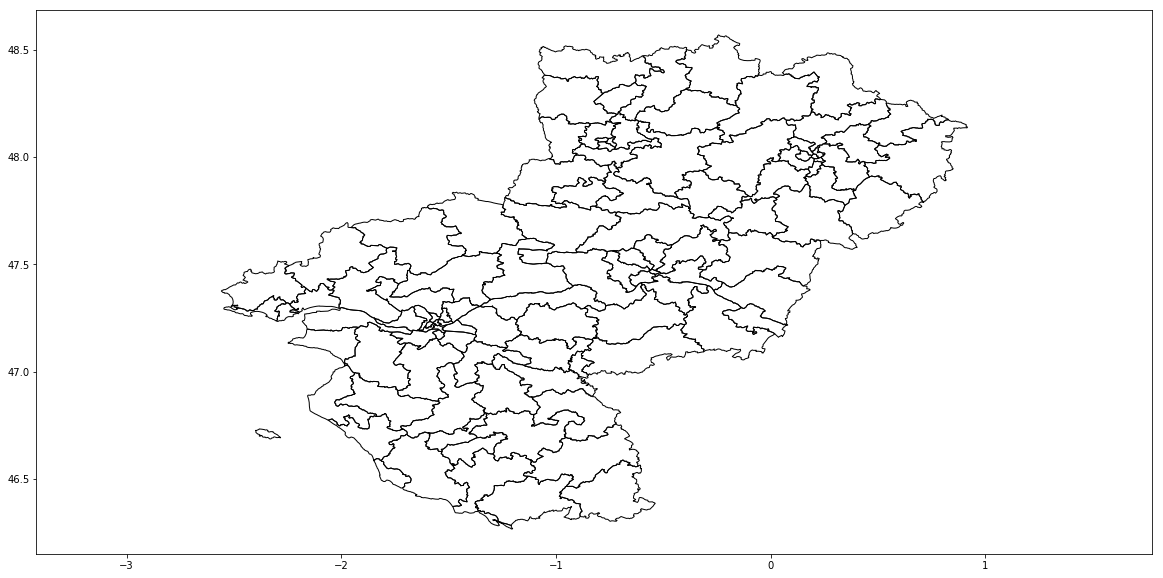

In [149]:
fig, ax = plt.subplots(figsize=(20, 10))
polygons = []
for canton in cantons_in_dep:
    #print(np.array(canton['geometry']['coordinates'][0]).shape)
    polygons.append(Polygon(np.array(canton['geometry']['coordinates'][0]).reshape(-1, 2), 
                            fill=False, 
                            color='k'))
p = PatchCollection(polygons, match_original=True)
ax.add_collection(p)
ax.axis('equal')